## Background 

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, as per the data new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. Data indicates a shift in demand towards pre-owned cars. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), scenario with used cars is way different with huge uncertainty in both pricing and supply. Owning to this undecertainity the pricing scheme of these used cars becomes important in order to grow in the market.

## Objective

As a senior data scientist at Cars4U, a pricing model has to be devised that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.


## Data
1. S.No. : Serial Number
2. Name : Name of the car which includes Brand name and Model name
3. Location : The location in which the car is being sold or is available for purchase Cities
4. Year : Manufacturing year of the car
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission : The type of transmission used by the car. (Automatic / Manual)
8. Owner : Type of ownership
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg
10. Engine : The displacement volume of the engine in CC.
11. Power : The maximum power of the engine in bhp.
12. Seats : The number of seats in the car.
13. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
14. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

## Key Questions:

1. What are the key factors influencing the pricing of used cars based on the data?
2. To what extent do each of the variables impact the price of the used car?
3. What is the correlation between these attributes if any?
2. Is there a good predictive model for predicting the price of used cars? What does the performance assessment look like for such a model?

### Loading necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To build linear model for prediction
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


pd.set_option('display.max_columns', None)
# No limit of column display

pd.set_option('display.max_rows', 200)
# Max 200 rows could be displayed

### Reading data from the dataset and checking the shape

In [2]:
carsdf = pd.read_csv("D:\\course\\USED_CARS_DATA.csv")
print(f'There are {carsdf.shape[0]} rows and {carsdf.shape[1]} columns.')  # f-string


np.random.seed(2) # setting the random seed via np.random.seed to get the same random result
carsdf.sample(n=10) # 10 random rows

There are 7253 rows and 14 columns.


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4584,4584,Tata Tigor 1.05 Revotorq XT,Kochi,2018,28973,Diesel,Manual,First,24.7 kmpl,1047 CC,69 bhp,5.0,NaN,6.64
6505,6505,Volkswagen Vento Diesel Highline,Chennai,2011,76041,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
3675,3675,Maruti Swift VDI,Ahmedabad,2012,65000,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,NaN,3.90
5654,5654,Hyundai i20 Magna Optional 1.2,Kochi,2014,42315,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,NaN,4.79
4297,4297,Toyota Camry 2.5 G,Mumbai,2014,68400,Petrol,Automatic,First,12.98 kmpl,2494 CC,178.4 bhp,5.0,NaN,13.50
2603,2603,Mercedes-Benz New C-Class 220 CDI AT,Jaipur,2010,74213,Diesel,Automatic,First,14.84 kmpl,2143 CC,170 bhp,5.0,NaN,11.50
4337,4337,Volkswagen Vento Petrol Highline AT,Kochi,2014,32283,Petrol,Automatic,Second,14.4 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.41
6625,6625,Maruti Swift VDI BSIV,Kolkata,2012,72000,Diesel,Manual,First,17.8 kmpl,1248 CC,null bhp,5.0,NaN,NaN
2846,2846,Skoda Superb Elegance 1.8 TSI AT,Kochi,2011,73783,Petrol,Automatic,Second,13.7 kmpl,1798 CC,157.75 bhp,5.0,NaN,5.23
1237,1237,Audi Q3 2.0 TDI Quattro,Hyderabad,2013,60000,Diesel,Automatic,First,17.32 kmpl,1968 CC,184 bhp,5.0,NaN,21.00


* Mileage is in kmpl
* Units for Engine are cc.
* Units for power are bhp
* Lot of null values in price of new car for same model

**Check for duplicate values in the data.**

In [3]:
carsdf.duplicated().sum()

0

**No duplicate values found in the data.**

**Data types of the columns in the dataset.**

In [4]:
carsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


* There are many string (*object* type) columns in the data as compared to numeric (int or float) type columns
* Dependent variable is the Price is of *float* type.

**Missing value check in the data.**

In [5]:
carsdf.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

* There are huge number of missing values in New_price and Price columns with the New_price column having the most

### Summary of the dataset

In [6]:
carsdf.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253,NaN,NaN,NaN,3626,2093.91,0,1813,3626,5439,7252
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253,NaN,NaN,NaN,2013.37,3.25442,1996,2011,2014,2016,2019
Kilometers_Driven,7253,NaN,NaN,NaN,58699.1,84427.7,171,34000,53416,73000,6.5e+06
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Top brand is Mahindra XUV500 W8 2WD.
* Top location is mumbai
* Top fuel type are diesel cars
* There are more manual transmission cars in the dataset.
* kilometers driven in the data has a very wide range .

### From the data overview, we see that many columns in the data need to be preprocessed before they can be used for analysis.

## Data Preprocessing

### Dropping the missing values in *Price* column as it is the target variable.

In [7]:
carsdf.dropna(subset=["Price"], inplace=True)

In [8]:
# checking missing values in rest of the data
carsdf.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

**New function first word to get the first word from the string.**

In [9]:
def first_word(col_val):
    """This function takes in a string and returns the first word from it. 
    Basically splits on the first space in the word For example, 'Maruti Swift VDI' becomes 'Maruti'.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(col_val, str):  # checks if `income_val` is a string
       
        return col_val.split()[0] 
        
    else:  # this happens when the current income is np.nan
        return np.nan   

The name of the car contains the brand which definitely plays a rold to a great extent to determine the price
of used car, but there are 2041 distinct values. These are a lot of values for one hot encoding and hence 
taking the main brands for analysis instead of with the model information.

In [10]:
carsdf['Name'] = carsdf['Name'].apply(first_word)

In [11]:
carsdf['Name'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Ambassador          1
Bentley             1
Smart               1
Lamborghini         1
Name: Name, dtype: int64

* The mileage column contains a string kmpl suffixed to it
* The Engine column contains a string CC suffixed to it
* The Power column contains a string bhp suffixed to it

We need to massage the data to remove these strings for our modelling.

**New function get_strs to get any string values for an alphanumeric column.**

In [12]:
mil_strs = []
def get_strs(col_val):
    """This function takes in a string representing a mileage in kmpl
    and converts it to a number. For example, '€220K' becomes 220000.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    charstr = ""
    mumstr = ""
    if isinstance(col_val, str):
        for c in str(col_val.strip()):
            if c.isdigit():
                mumstr = mumstr + c
            else :
                if c != ".":
                  charstr = charstr + c
            
             
    if  charstr not in mil_strs:
        mil_strs.append(charstr)

**Get the distinct strings from the alphanumeric mileage column.**

In [13]:
carsdf['Mileage'].apply(get_strs)  
list_set = set(mil_strs)
unique_strs = (list(list_set))
print(unique_strs)

['', ' kmpl', ' km/kg']


**New function mileage_to_num to separate the numerical mileage values from strings like kmpl.**

In [14]:
def mileage_to_num(col_val):
    """This function takes in a string representing a salary in Euros
    and converts it to a number. For example, '13.7 kmpl' becomes 13.7.
    """
    if isinstance(col_val, str):  # checks if `income_val` is a string
       
        if col_val.endswith('km/kg'):
            return float(col_val.replace(' km/kg', '')) 
        elif col_val.endswith('kmpl'):
            return float(col_val.replace(' kmpl', '')) 
    else:  # this happens when the current income is np.nan
        return np.nan


In [15]:
carsdf['Mileage'] = carsdf['Mileage'].apply(mileage_to_num)

In [16]:
carsdf.sample(n=10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1045,1045,Hyundai,Coimbatore,2016,44178,Petrol,Manual,First,18.90,1197 CC,82 bhp,5.0,NaN,5.88
2371,2371,Maruti,Pune,2014,29202,CNG,Manual,First,33.54,998 CC,67.04 bhp,5.0,5.54 Lakh,3.90
1313,1313,Hyundai,Chennai,2008,121097,Diesel,Manual,Second,24.00,1396 CC,88.76 bhp,5.0,10.73 Lakh,1.90
1198,1198,Volkswagen,Hyderabad,2019,1000,Petrol,Manual,First,18.78,999 CC,75 bhp,5.0,6.74 Lakh,5.68
1753,1753,Mahindra,Chennai,2011,110000,Diesel,Manual,Second,21.00,1461 CC,64.1 bhp,5.0,NaN,2.40
1492,1492,Honda,Delhi,2008,70000,Petrol,Manual,First,13.10,1997 CC,141.1 bhp,5.0,NaN,4.00
3449,3449,Volkswagen,Bangalore,2013,74000,Petrol,Manual,First,16.47,1198 CC,73.9 bhp,5.0,NaN,4.65
5229,5229,BMW,Bangalore,2012,73000,Diesel,Automatic,First,22.69,1995 CC,190 bhp,5.0,48.79 Lakh,12.50
4257,4257,Maruti,Mumbai,2010,66000,Petrol,Manual,First,19.70,796 CC,46.3 bhp,5.0,NaN,1.50
487,487,Hyundai,Kolkata,2013,37873,Diesel,Manual,First,22.32,1582 CC,126.32 bhp,5.0,NaN,4.80


**Get the distinct strings from the alphanumeric Engine column.**

In [17]:
mil_strs = []
carsdf['Engine'].apply(get_strs)  
list_set = set(mil_strs)
unique_strs = (list(list_set))
print(unique_strs)

['', ' CC']


**New function engine_to_num to separate the numerical engine values from strings like CC.**

In [18]:
def engine_to_num(col_val):
    """This function takes in a string representing the engine
    and converts it to a number. For example, '1582 CC' becomes 1582.
    """
    if isinstance(col_val, str):  # checks if `income_val` is a string
       
        if col_val.endswith('CC'):
            return float(col_val.replace(' CC', ''))
    else:  # this happens when the current income is np.nan
        return np.nan

    

carsdf['Engine'] = carsdf['Engine'].apply(engine_to_num)

In [19]:
carsdf.sample(n=10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6012,6012,Toyota,Coimbatore,2011,45004,Diesel,Manual,First,12.80,2494.0,102 bhp,7.0,NaN,9.48
467,467,Honda,Kolkata,2011,48466,Petrol,Manual,First,17.00,1497.0,118 bhp,5.0,NaN,3.26
3833,3833,Hyundai,Pune,2013,41500,Petrol,Manual,Second,17.01,1591.0,121.3 bhp,5.0,NaN,5.00
1549,1549,Renault,Kochi,2016,57390,Diesel,Manual,First,19.01,1461.0,108.45 bhp,5.0,NaN,6.73
4370,4370,Renault,Jaipur,2017,31056,Petrol,Manual,First,23.01,999.0,67 bhp,5.0,NaN,3.60
234,234,Ford,Kolkata,2012,41284,Diesel,Manual,First,20.00,1399.0,68.05 bhp,5.0,NaN,2.50
430,430,Honda,Delhi,2014,30000,Petrol,Manual,Second,19.40,1198.0,86.8 bhp,5.0,NaN,3.20
5276,5276,Mercedes-Benz,Ahmedabad,2015,13500,Diesel,Automatic,First,17.90,2143.0,136 bhp,5.0,NaN,25.51
856,856,Honda,Coimbatore,2015,63856,Petrol,Automatic,First,13.70,1997.0,153.86 bhp,5.0,NaN,13.96
2724,2724,Honda,Hyderabad,2014,28000,Petrol,Automatic,First,16.50,1198.0,86.8 bhp,5.0,NaN,4.95


In [20]:
mil_strs = []
carsdf['Power'].apply(get_strs)  
list_set = set(mil_strs)
unique_strs = (list(list_set))
print(unique_strs)

['', 'null bhp', ' bhp']


* Checking how many rows have the value null bhp as they need to be initialized with nan

In [21]:
print(carsdf[carsdf.Power == 'null bhp'].shape[0])

107


**New function power_to_num to separate the numerical power values from strings like bhp.**

In [22]:
def power_to_num(col_val):
    """This function takes in a string representing a salary in Euros
    and converts it to a number. For example, '€220K' becomes 220000.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(col_val, str):  # checks if `income_val` is a string
       
        if col_val.endswith(' bhp') and col_val != 'null bhp':
            return float(col_val.replace(' bhp', ''))
        elif col_val == 'null bhp':
            return np.nan
    else:  # this happens when the current income is np.nan
        return np.nan

    

carsdf['Power'] = carsdf['Power'].apply(power_to_num)

In [23]:
carsdf.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64

**Get the distinct strings from the alphanumeric New_Price column if any.**

In [24]:
mil_strs = []
carsdf['New_Price'].apply(get_strs)  
list_set = set(mil_strs)
unique_strs = (list(list_set))
print(unique_strs)

['', ' Cr', ' Lakh']


**New function price_to_num to separate the numerical New_Price values from strings like Lakhs and Cr and multiply with 100000 for lakhs and where not string specified and by 10000000 for crores.**

In [25]:
def price_to_num(col_val):
    """This function takes in a string representing a price in lakhs/crores
    and converts it to a number. For example, '14.5 Lakh' becomes 1450000.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(col_val, str):  # checks if `col_val` is a string
        multiplier = 100000  # handles lakh & Cr
        if col_val.endswith(' Lakh'):
            multiplier = 100000
        elif col_val.endswith(' Cr'):
            multiplier = 10000000
        return float(col_val.replace(' Lakh', '').replace(' Cr', '')) * multiplier
    else:  # this happens when the current income is np.nan
        return np.nan

carsdf['New_Price'] = carsdf['New_Price'].apply(price_to_num)

In [26]:
carsdf.sample(n=10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4938,4938,Audi,Coimbatore,2015,56238,Diesel,Automatic,First,11.33,4134.0,335.20,7.0,NaN,51.69
2553,2553,Audi,Coimbatore,2015,21979,Diesel,Automatic,First,17.11,1968.0,174.33,5.0,NaN,23.45
2107,2107,Toyota,Hyderabad,2015,116000,Diesel,Manual,Second,23.59,1364.0,67.05,5.0,NaN,5.80
2404,2404,Renault,Hyderabad,2016,73000,Petrol,Manual,First,25.17,799.0,53.30,5.0,NaN,3.20
4181,4181,Maruti,Kochi,2017,15134,Petrol,Manual,First,21.40,1197.0,83.10,5.0,736000.0,6.37
5130,5130,Maruti,Kolkata,2008,42000,Petrol,Manual,First,19.70,796.0,46.30,5.0,NaN,1.09
4643,4643,Toyota,Pune,2015,36000,Diesel,Automatic,First,12.55,2982.0,168.50,7.0,NaN,22.00
4311,4311,Mercedes-Benz,Pune,2009,100000,Diesel,Automatic,First,11.00,2987.0,198.50,5.0,NaN,11.50
2411,2411,Mercedes-Benz,Delhi,2011,51000,Petrol,Automatic,First,11.74,1796.0,186.00,5.0,NaN,11.50
2723,2723,Honda,Kochi,2015,53442,Petrol,Manual,First,16.80,1497.0,116.30,5.0,NaN,7.00


**Get the distinct strings from the Price column if any.**

In [27]:
mil_strs = []
carsdf['Price'].apply(get_strs)  
list_set = set(mil_strs)
unique_strs = (list(list_set))
print(unique_strs)

['']


* The Price column is Float data type so it will not have any strings. 
* Also since all the values in Price column are in lakhs as not specified otherwise so  not multipliying with the lakh multiplier.

In [28]:
carsdf.sample(n=10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
889,889,Maruti,Ahmedabad,2015,51530,Petrol,Manual,First,18.90,998.0,67.1,5.0,NaN,3.20
3175,3175,Jaguar,Coimbatore,2014,82536,Diesel,Automatic,First,14.74,2993.0,270.9,5.0,NaN,28.63
1131,1131,Maruti,Jaipur,2017,38282,Diesel,Manual,First,28.09,1248.0,88.5,5.0,NaN,8.50
2688,2688,Mercedes-Benz,Chennai,2015,54000,Diesel,Automatic,First,17.90,2143.0,136.0,5.0,NaN,17.55
132,132,Maruti,Coimbatore,2016,30232,Petrol,Manual,First,21.10,1197.0,85.8,5.0,NaN,5.81
3757,3757,Toyota,Hyderabad,2014,59589,Diesel,Manual,First,23.59,1364.0,67.1,5.0,NaN,5.60
2726,2726,Hyundai,Hyderabad,2011,70000,Diesel,Manual,First,16.80,1493.0,110.0,5.0,NaN,5.10
4908,4908,Maruti,Kochi,2012,77407,Diesel,Manual,Second,21.50,1248.0,88.8,5.0,NaN,3.53
6008,6008,Porsche,Hyderabad,2013,40000,Diesel,Automatic,Second,17.85,2967.0,300.0,4.0,NaN,45.00
895,895,Mercedes-Benz,Kochi,2015,42076,Diesel,Automatic,First,13.00,2143.0,201.1,5.0,NaN,21.80


* Getting distinct values from Owner Type column

In [29]:
carsdf['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

### Missing value treatment

** Put the mean values in place of nulls for the Seats column since there are only 42 nulls **

In [30]:
print(carsdf['Seats'].isnull().sum())
carsdf['Seats'].fillna(carsdf['Seats'].mean(), inplace=True)  # mean imputation
carsdf['Seats'].isnull().sum()

42


0

** Put the mean values in place of nulls for the Power column with mean value since there are only 143 nulls **

In [31]:
print(carsdf['Power'].isnull().sum())
carsdf['Power'].fillna(carsdf['Power'].mean(), inplace=True)  # mean imputation
carsdf['Power'].isnull().sum()

143


0

** Put the mean values in place of nulls for the Power column with mean value since there are only 36 nulls **

In [32]:
print(carsdf['Engine'].isnull().sum())
carsdf['Engine'].fillna(carsdf['Engine'].mean(), inplace=True)  # mean imputation
carsdf['Engine'].isnull().sum()

36


0

** Put the mean values in place of nulls for the Power column with mean value since there are only 2 nulls **

In [33]:
print(carsdf['Mileage'].isnull().sum())
carsdf['Mileage'].fillna(carsdf['Mileage'].mean(), inplace=True)  # mean imputation
carsdf['Mileage'].isnull().sum()

2


0

* No null values in kilometres drive

In [34]:
print(carsdf['Kilometers_Driven'].isnull().sum())

0


In [35]:
carsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6019 non-null   float64
 9   Engine             6019 non-null   float64
 10  Power              6019 non-null   float64
 11  Seats              6019 non-null   float64
 12  New_Price          824 non-null    float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 705.4+ KB


### Univariate Analysis

In [36]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Creating the function that will help create a boxplot and a histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    ) # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

### *Price* (the target variable)

C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


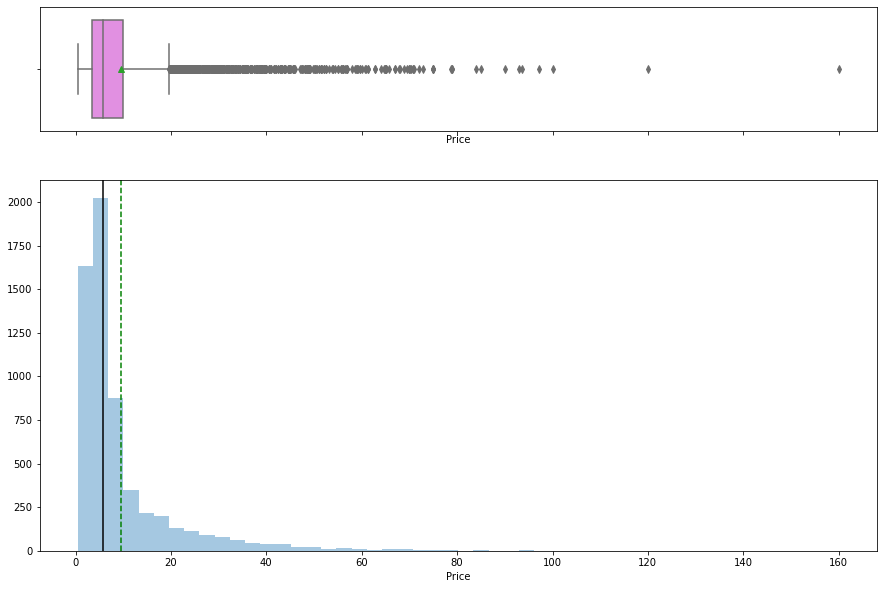

In [37]:
histogram_boxplot(carsdf["Price"])

* The distribution is right-skewed with a median price of less than 10 lakhs.

### *New Price* 

C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


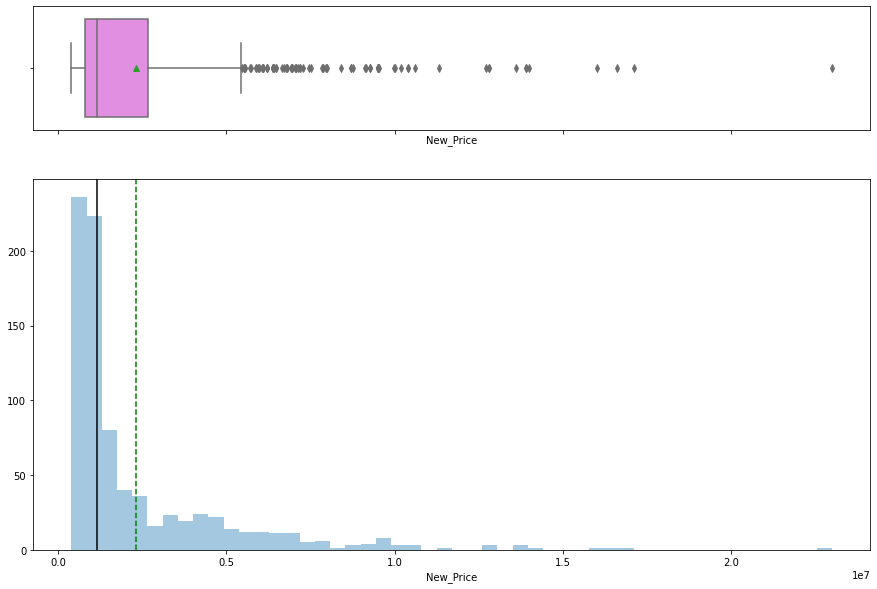

In [38]:
histogram_boxplot(carsdf["New_Price"])

* The distribution is right-skewed as owing to huge number of null values we filled the nulls with mean value.

### *Seats* 

C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


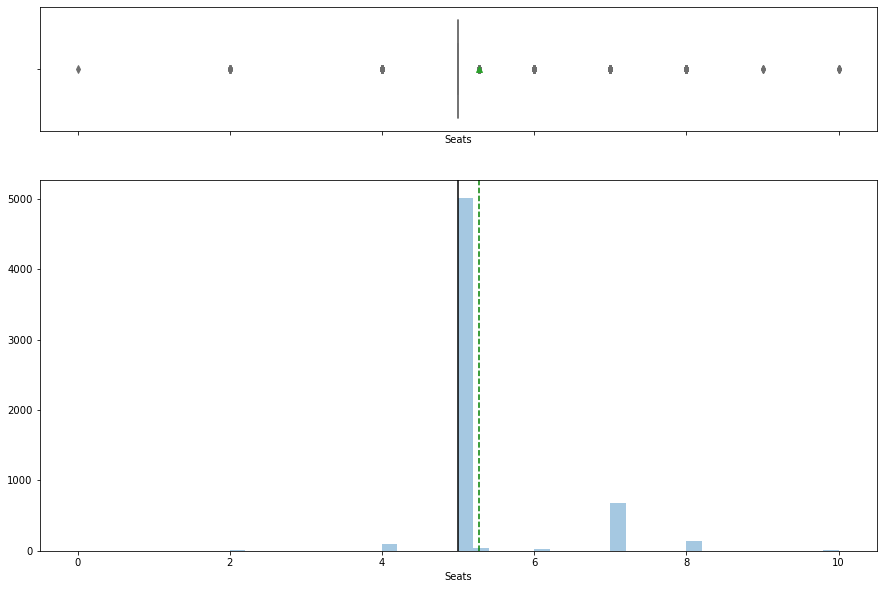

In [39]:
histogram_boxplot(carsdf["Seats"])

* The distribution is evenly distributed with seats nearing mean value.

### *Power* 

C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


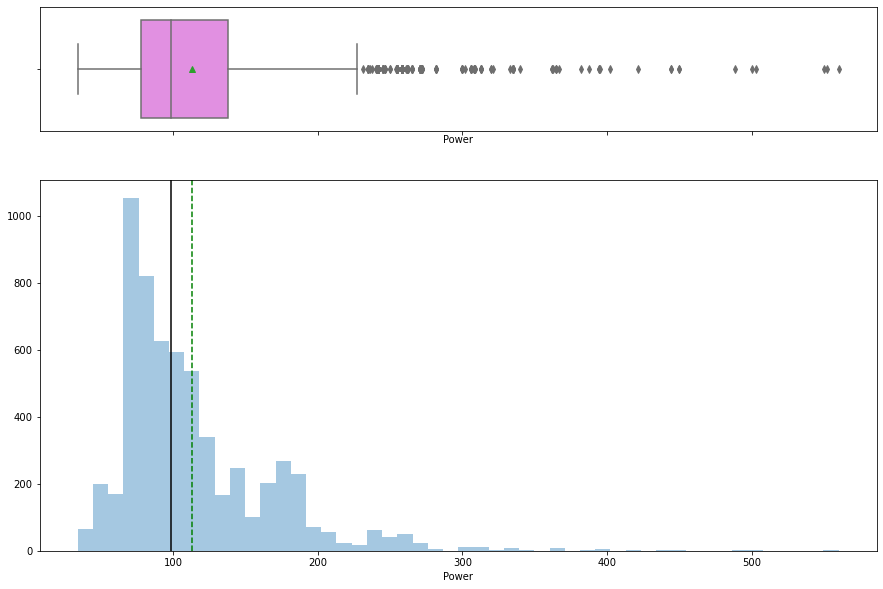

In [40]:
histogram_boxplot(carsdf["Power"])

* The distribution is relatively right skewed with median value near 100 bhp.

### *Engine* 

C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


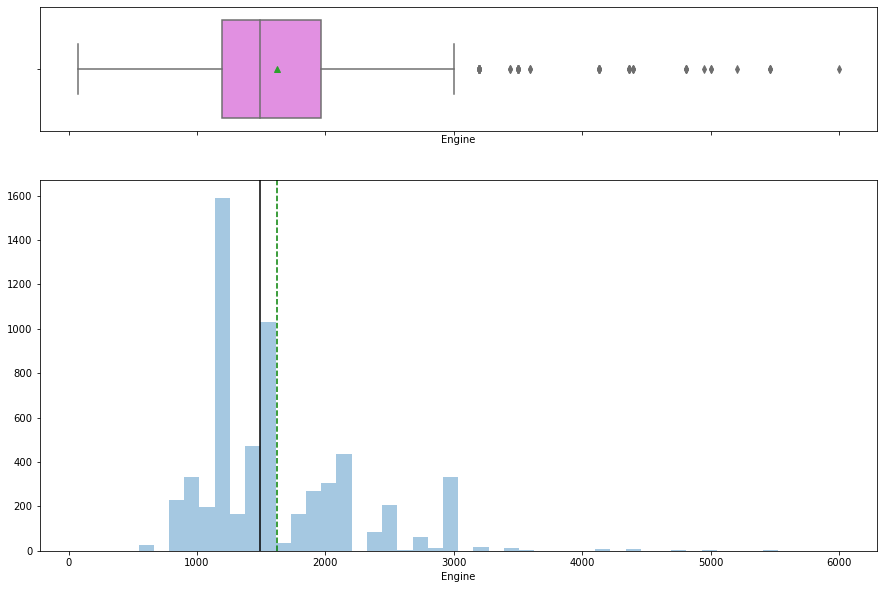

In [41]:
histogram_boxplot(carsdf["Engine"])

* The distribution is relatively right skewed with median value near 1500 cc.

### *Mileage* 

C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


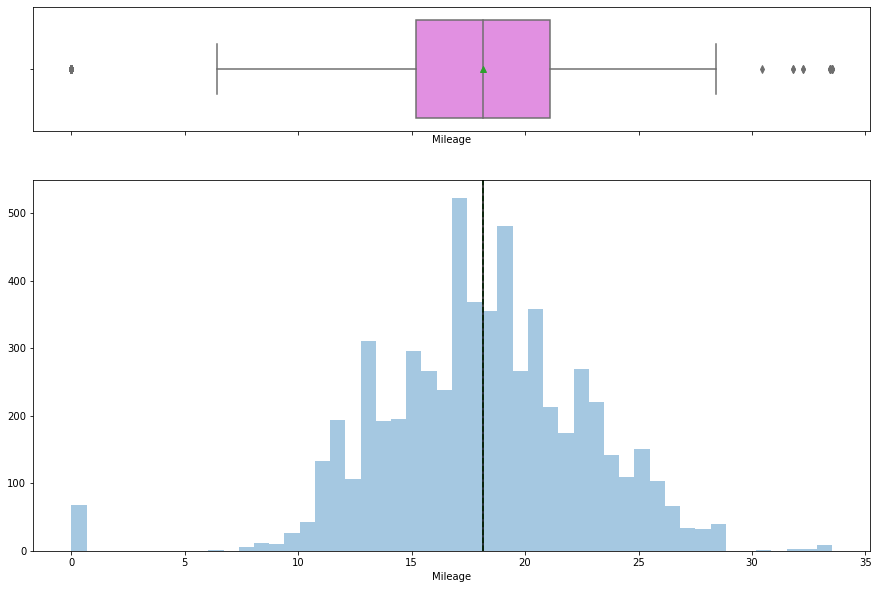

In [42]:
histogram_boxplot(carsdf["Mileage"])

* The distribution is relatively evenly distributed with median around 18 kmph.

### *Kilometers driven* 

C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


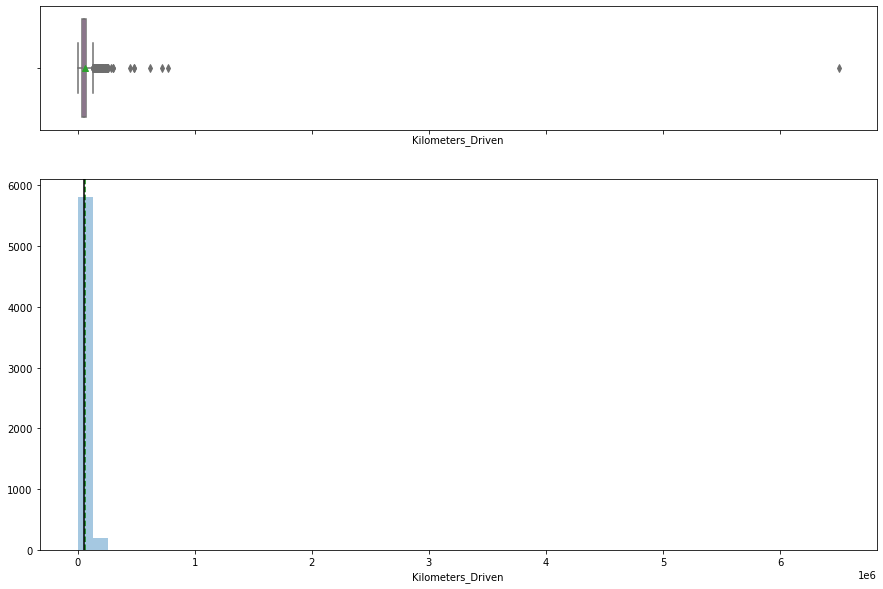

In [43]:
histogram_boxplot(carsdf["Kilometers_Driven"])

* The distribution is heavily right-skewed

### *Year* 

C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


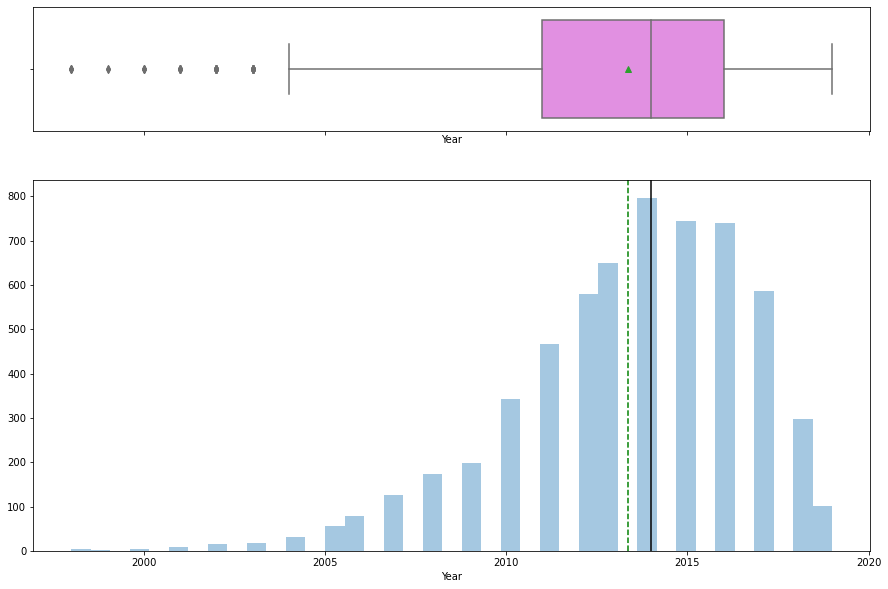

In [44]:
histogram_boxplot(carsdf["Year"])

* The distribution is left-skewed, and most of the cars are of 2014 or more.

In [45]:
# Function to create barplots that indicate percentage for each category.
def percent_wise_bar(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

## *Categorical Variable distribution* 

### *Name* 

C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


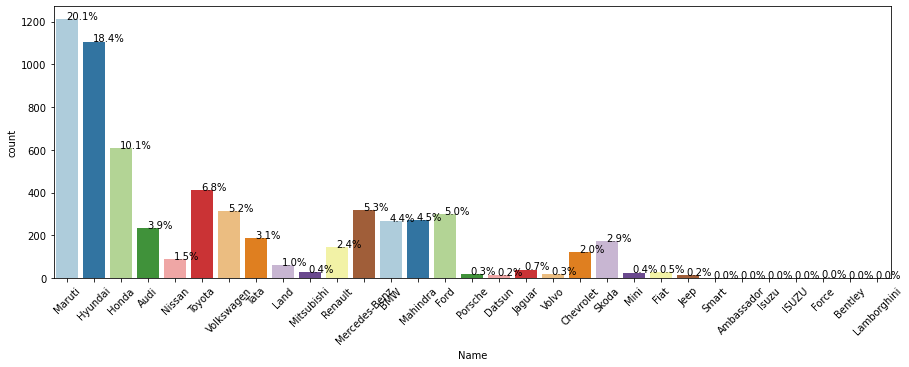

In [46]:
percent_wise_bar(carsdf, "Name")

* Maruti and Hyundai are the most brand of used cars.

### *Owner Type* 

C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


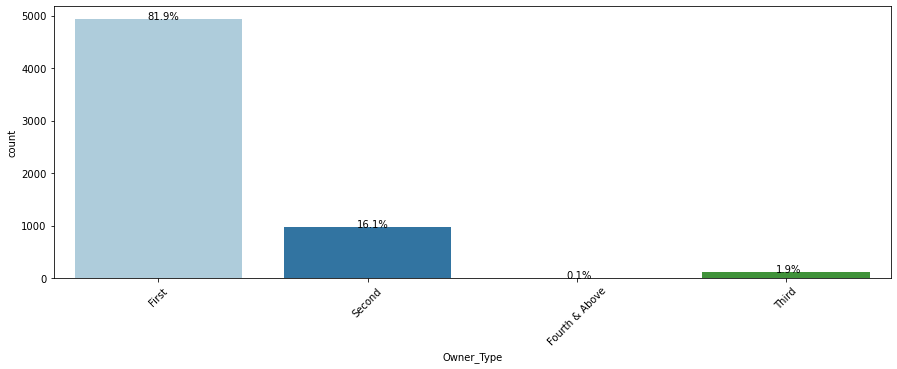

In [47]:
percent_wise_bar(carsdf, "Owner_Type")

* 81% of used cars have one owner

### *Transmission* 

C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


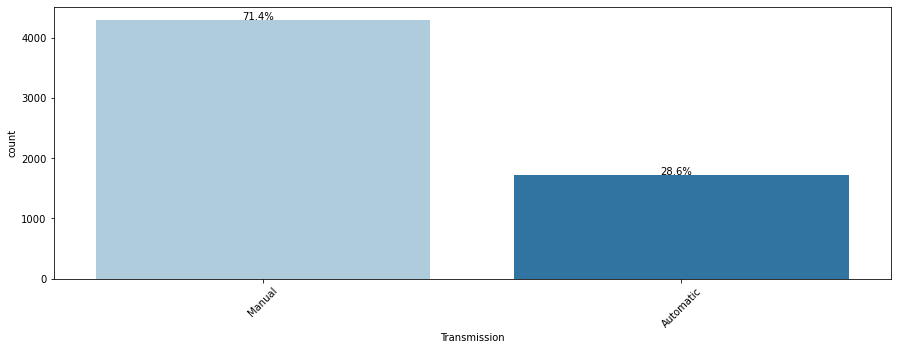

In [48]:
percent_wise_bar(carsdf, "Transmission")

* 71% of used cars have manual transmission

### *Fuel Type* 

C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


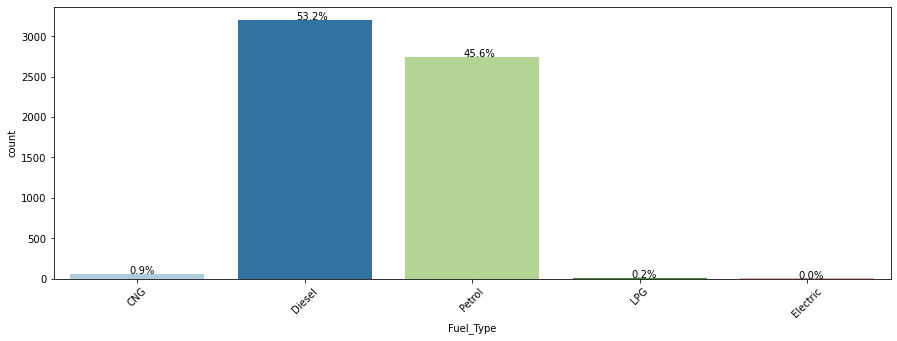

In [49]:
percent_wise_bar(carsdf, "Fuel_Type")

* 53% of cars are diesel run and 45% petrol run cars

### *Location* 

C:\Users\appradha.ORADEV\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


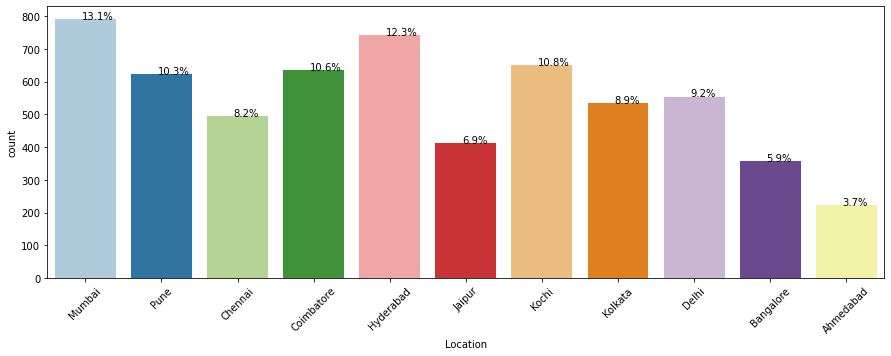

In [50]:
percent_wise_bar(carsdf, "Location")

* Highest percentage of used cars are from Mumbai

In [51]:
carsdf.reset_index(inplace=True, drop=True)

In [52]:
carsdf.drop('S.No.', axis=1, inplace=True)

## Bivariate analysis

In [53]:
# creating a list of columns for correlation
corr_cols = [item for item in carsdf.columns]
print(corr_cols)

['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']


### Checking correlation between variables

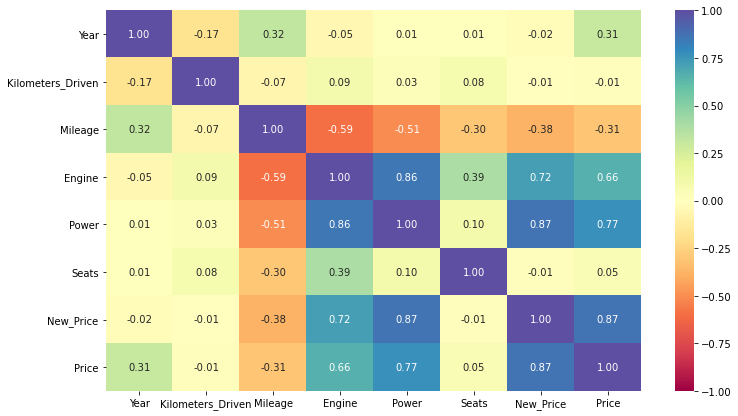

In [54]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    carsdf[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Price and Power and Price and New Price are highly correlated.
* Price and Engine are correlated and Engine and New Price are correlated.

### Checking the variation in *Price* with  the categorical columns

### *Owner Type* vs *Price*

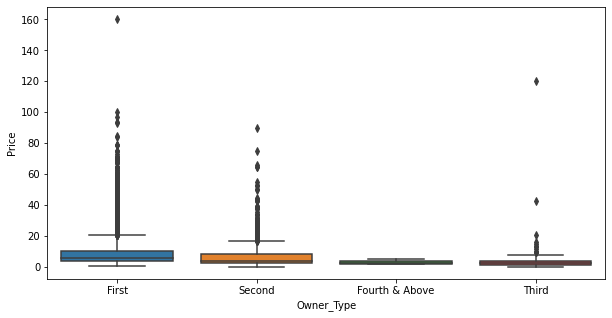

In [55]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Owner_Type", y="Price", data=carsdf);

* All categories of cars first hand , second hand, third hand and fourth hand have similar kind of Price. 

### *Transmission* vs *Price*

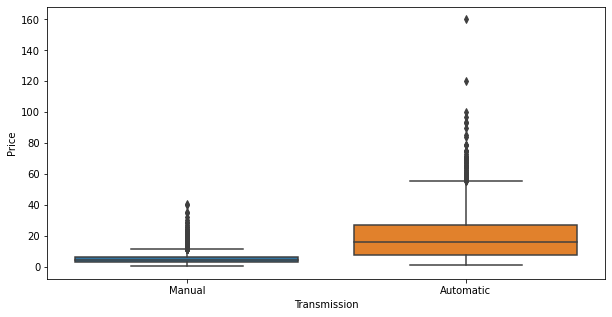

In [56]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Transmission", y="Price", data=carsdf);

* Manual used cars have lower price.
* Manual and automatic used cars both categories have a few outliers

### *Fuel Type* vs *Price*

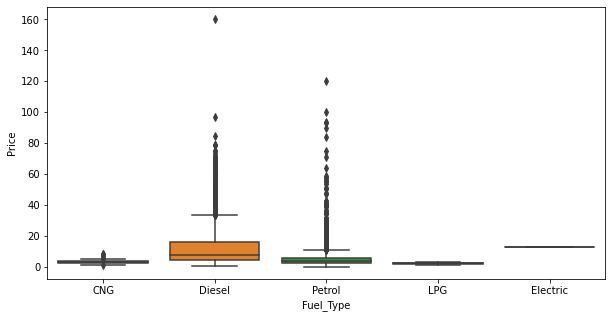

In [57]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=carsdf);

* Electric used cars have nearly same price and is higher.
* There are quite bit of outliers in petrol fuel type cars.
* Diesel fuel type car has one outlier which has a very high price.

### *Name* vs *Price*

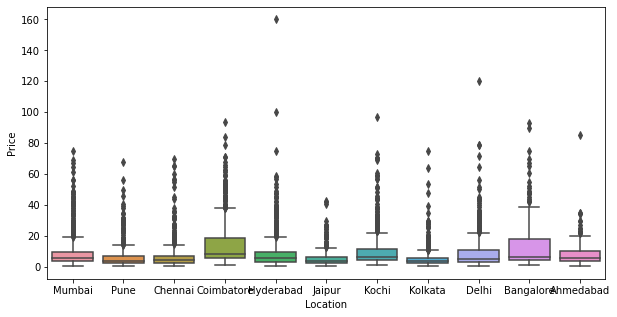

In [58]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Location", y="Price", data=carsdf);

* Used cars from Coimbatore and Banglore have highers prices than other locations.
* Used cars from Kolkata and Jaipur have lower prices than other locations.

### Checking the numeric columns  for skewness

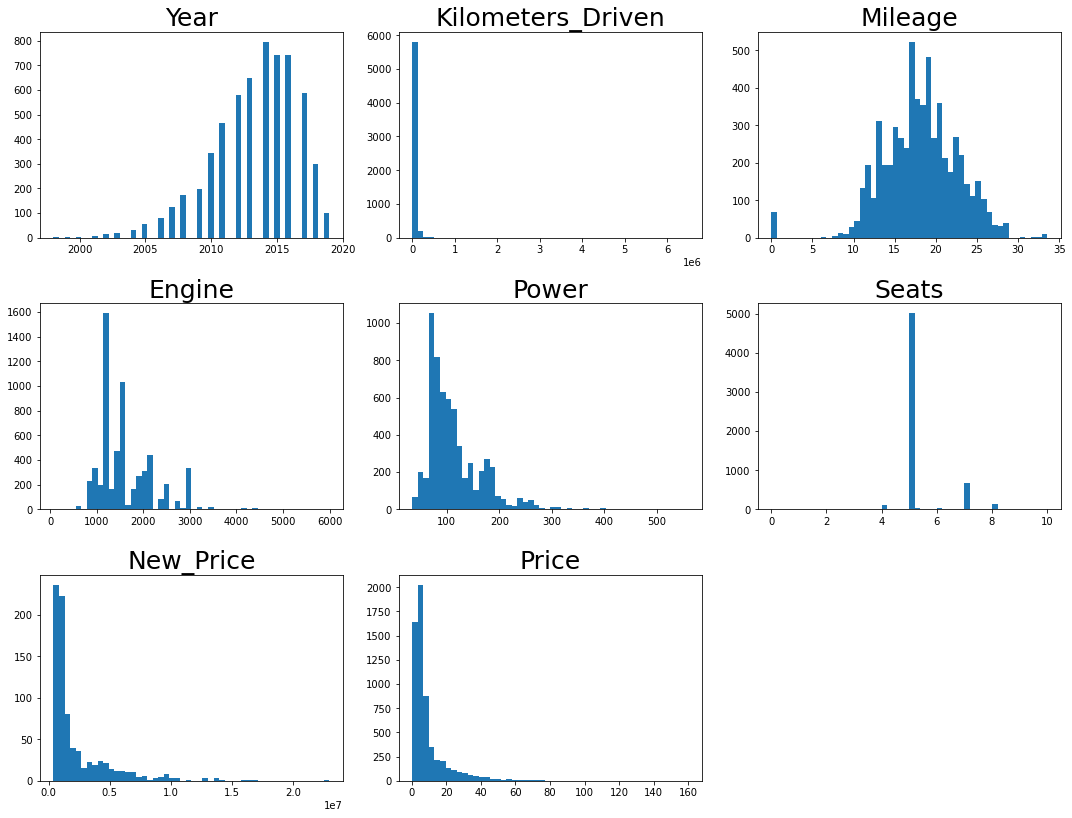

In [59]:
# creating a list of numeric columns
dist_cols = [
    item for item in carsdf.select_dtypes(include=np.number).columns 
]
# Plotting the histogram
plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(carsdf[dist_cols[i]], bins=50)
    # sns.histplot(data=df4, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

* We see that most of the columns have a very skewed distribution.
* **We will apply the log transformation to deal with skewness in the data.**

In [60]:
# creating a copy of the dataframe to create logtransformation
carsdfb = carsdf.copy()
# removing Mileage column as it is evenly distributed
dist_cols.remove("Mileage")

In [61]:
# using log transforms on some columns

for col in dist_cols:
    carsdfb[col + "_log"] = np.log(carsdfb[col] + 1)

# dropping the original columns
carsdfb.drop(dist_cols, axis=1, inplace=True)
carsdfb.head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Seats_log,New_Price_log,Price_log
0,Maruti,Mumbai,CNG,Manual,First,26.60,7.606387,11.184435,6.906755,4.080246,1.791759,NaN,1.011601
1,Hyundai,Pune,Diesel,Manual,First,19.67,7.608871,10.621352,7.367077,4.845761,1.791759,NaN,2.602690
2,Honda,Chennai,Petrol,Manual,First,18.20,7.606885,10.736418,7.090077,4.496471,1.791759,13.665851,1.704748
3,Maruti,Chennai,Diesel,Manual,First,20.77,7.607381,11.373675,7.130099,4.497139,2.079442,NaN,1.945910
4,Audi,Coimbatore,Diesel,Automatic,Second,15.20,7.607878,10.613271,7.585281,4.954418,1.791759,NaN,2.930660


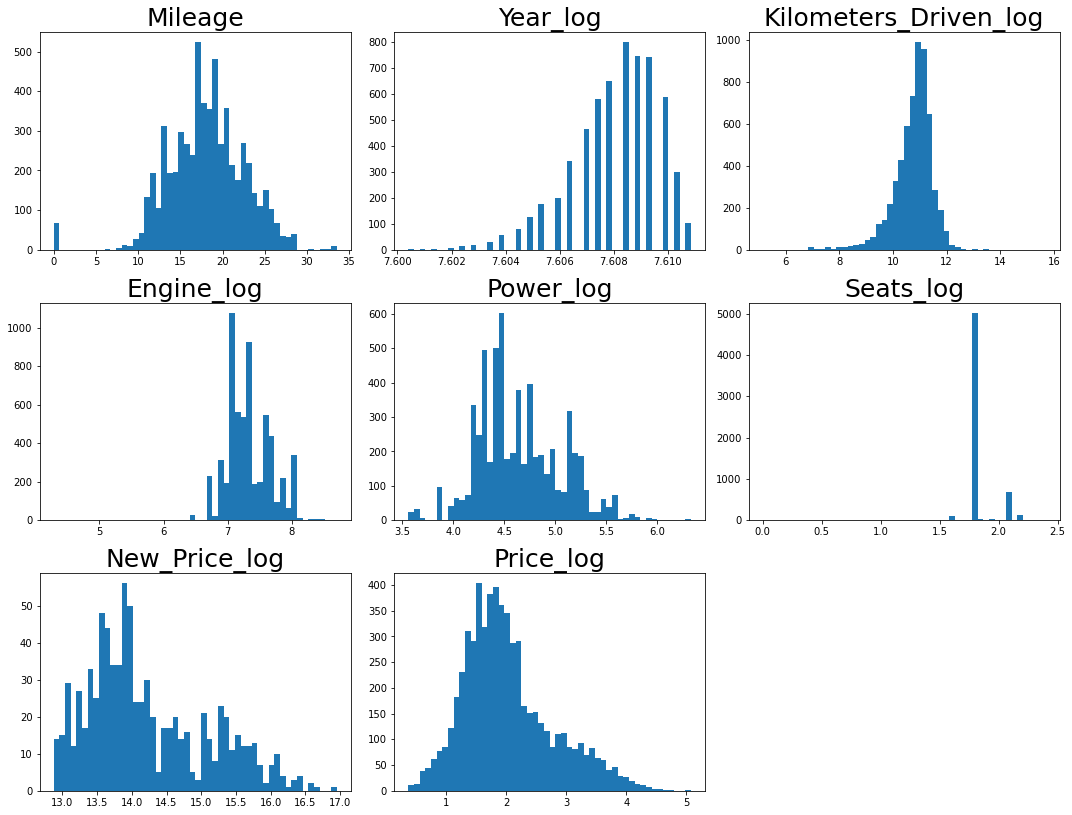

In [62]:
# creating a list of numeric columns
dist_cols = [
    item for item in carsdfb.select_dtypes(include=np.number).columns 
]

# Plotting the historgam

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(carsdfb[dist_cols[i]], bins=50)
    # sns.histplot(data=df4, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

* The columns are much more evenly distributed

### Checking correlation between variables

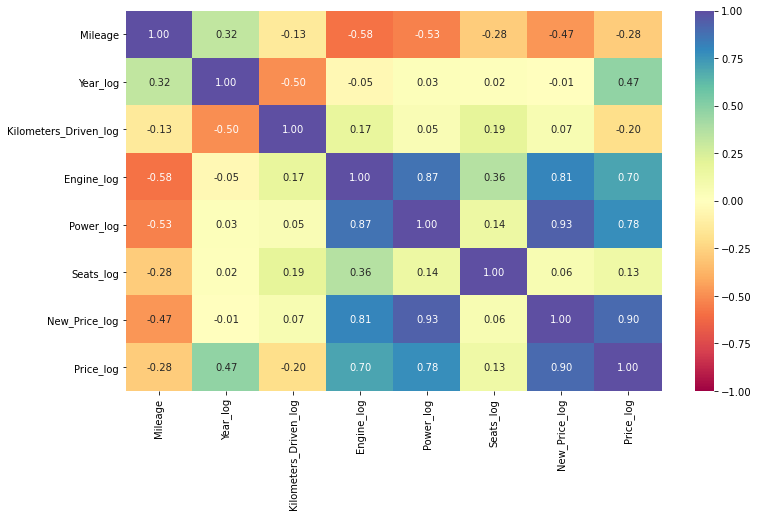

In [64]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    carsdfb[dist_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There are a few highly correlated columns like Price and New Price, Price and Power, Price and Engine capacity.


## Model Building

### Creating dummy variables

In [65]:
# use pd.concat to join the new columns with your original dataframe
carsdfb = pd.concat([carsdfb,pd.get_dummies(carsdfb['Transmission'], prefix='Transmission')],axis=1)

# now drop the original 'Transmission' column 
carsdfb.drop(['Transmission'],axis=1, inplace=True)

In [66]:
carsdfb.sample(n=10)

,Name,Location,Fuel_Type,Owner_Type,Mileage,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Seats_log,New_Price_log,Price_log,Transmission_Automatic,Transmission_Manual
289,Honda,Ahmedabad,Petrol,First,17.40,7.608374,10.799596,7.311886,4.773224,1.791759,NaN,2.066863,0,1
131,Mahindra,Jaipur,Diesel,First,16.00,7.609367,10.896758,7.687080,4.948760,2.079442,NaN,2.656757,1,0
4618,BMW,Hyderabad,Diesel,First,16.73,7.607878,11.440366,8.004366,5.389072,1.791759,NaN,3.314186,1,0
649,Mahindra,Delhi,Diesel,First,15.10,7.607381,11.190666,7.687080,4.948760,2.079442,NaN,2.208274,0,1
4980,Mahindra,Coimbatore,Diesel,First,18.49,7.609862,10.939888,7.309212,4.615121,2.079442,NaN,2.148268,0,1
5286,BMW,Chennai,Diesel,Second,16.07,7.605392,11.396403,7.598900,5.204007,1.609438,NaN,1.987874,1,0
1642,Skoda,Bangalore,Diesel,Second,20.00,7.606885,11.459757,7.585281,4.935193,1.791759,NaN,2.047693,1,0
2190,Mercedes-Benz,Kochi,Diesel,First,13.00,7.609367,10.756562,7.670429,5.323010,1.791759,NaN,3.421000,1,0
4003,Jaguar,Mumbai,Diesel,First,16.36,7.610358,8.006701,7.687080,5.240158,1.791759,NaN,3.979682,1,0
1412,Tata,Mumbai,Petrol,First,17.57,7.609367,10.685264,7.085064,4.496471,1.791759,13.545015,1.609438,0,1


In [67]:
#Dropping one of the hot encoded columns
carsdfb.drop(['Transmission_Automatic'],axis=1, inplace=True)

In [68]:
carsdfb.sample(n=10)

,Name,Location,Fuel_Type,Owner_Type,Mileage,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Seats_log,New_Price_log,Price_log,Transmission_Manual
2354,Hyundai,Delhi,Petrol,First,20.36,7.607381,10.985310,7.088409,4.380776,1.791759,NaN,1.348073,1
2259,Hyundai,Bangalore,Diesel,First,13.01,7.608871,10.985310,7.696213,5.274537,2.079442,NaN,3.091042,0
5140,Mercedes-Benz,Delhi,Diesel,First,14.21,7.608374,10.645449,7.670429,5.318120,1.791759,NaN,3.256172,0
1378,Hyundai,Kochi,Diesel,First,22.54,7.608374,10.748647,7.242082,4.497139,1.791759,NaN,1.686399,1
2891,Maruti,Bangalore,Diesel,First,17.80,7.607878,10.973220,7.130099,4.738416,1.791759,NaN,1.791759,1
3130,Volkswagen,Mumbai,Petrol,First,18.19,7.608374,11.027280,7.088409,4.649187,1.791759,NaN,1.894617,0
528,Maruti,Kochi,Petrol,First,20.40,7.609862,10.363977,7.088409,4.416428,1.791759,NaN,1.909543,1
4931,Mahindra,Pune,Diesel,First,18.49,7.609367,11.112463,7.309212,4.615121,2.079442,NaN,1.987874,1
5996,Jaguar,Kochi,Diesel,First,16.36,7.609367,10.346602,7.687080,5.240158,1.791759,NaN,3.451257,0
5039,Audi,Ahmedabad,Petrol,Second,9.74,7.605890,11.503895,7.593374,5.342334,1.791759,NaN,2.397895,0


In [69]:
# use pd.concat to join the new columns with your original dataframe
carsdfb = pd.concat([carsdfb,pd.get_dummies(carsdfb['Name'], prefix='Name')],axis=1)

# now drop the original 'Name' 
carsdfb.drop(['Name'],axis=1, inplace=True)

* Deleting the Name_Ambassador as it has least cardinality and deleting one of the hot encoded columns for name

In [70]:
carsdfb.drop(['Name_Ambassador'],axis=1, inplace=True)

In [71]:
carsdfb.sample(n=10)

,Location,Fuel_Type,Owner_Type,Mileage,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Seats_log,New_Price_log,Price_log,Transmission_Manual,Name_Audi,Name_BMW,Name_Bentley,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Force,Name_Ford,Name_Honda,Name_Hyundai,Name_ISUZU,Name_Isuzu,Name_Jaguar,Name_Jeep,Name_Lamborghini,Name_Land,Name_Mahindra,Name_Maruti,Name_Mercedes-Benz,Name_Mini,Name_Mitsubishi,Name_Nissan,Name_Porsche,Name_Renault,Name_Skoda,Name_Smart,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo
2646,Mumbai,Petrol,First,18.12,7.610853,6.908755,7.087574,4.475062,1.791759,NaN,2.054124,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3619,Delhi,Petrol,First,17.40,7.608374,10.901506,7.311886,4.773224,1.791759,NaN,1.981001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
688,Pune,Diesel,First,24.30,7.609862,10.545368,7.130099,4.494239,1.791759,NaN,2.196113,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
359,Delhi,Diesel,First,22.90,7.607878,11.156265,7.130099,4.317488,1.791759,NaN,1.504077,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
153,Coimbatore,Diesel,First,21.66,7.609367,10.908174,7.312553,4.649378,1.791759,NaN,2.385086,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5596,Pune,Diesel,Second,16.52,7.605392,11.326608,7.596894,4.825911,1.791759,NaN,1.280934,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3802,Mumbai,Petrol,First,18.90,7.609862,9.472782,7.088409,4.418841,1.791759,NaN,1.816452,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1974,Coimbatore,Petrol,First,12.05,7.610358,10.242136,7.999679,5.771441,1.791759,NaN,4.550397,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4439,Hyderabad,Diesel,First,21.90,7.608871,11.191287,7.242082,4.497139,1.791759,NaN,2.079442,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2105,Jaipur,Petrol,First,22.74,7.607878,11.362114,6.680855,3.877432,1.791759,NaN,1.226712,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
# use pd.concat to join the new columns with your original dataframe
carsdfb = pd.concat([carsdfb,pd.get_dummies(carsdfb['Fuel_Type'], prefix='Fuel_Type')],axis=1)

# now drop the original 'Fuel_Type' column 
carsdfb.drop(['Fuel_Type'],axis=1, inplace=True)

In [73]:
carsdfb.sample(n=10)

,Location,Owner_Type,Mileage,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Seats_log,New_Price_log,Price_log,Transmission_Manual,Name_Audi,Name_BMW,Name_Bentley,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Force,Name_Ford,Name_Honda,Name_Hyundai,Name_ISUZU,Name_Isuzu,Name_Jaguar,Name_Jeep,Name_Lamborghini,Name_Land,Name_Mahindra,Name_Maruti,Name_Mercedes-Benz,Name_Mini,Name_Mitsubishi,Name_Nissan,Name_Porsche,Name_Renault,Name_Skoda,Name_Smart,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
1320,Kochi,First,22.69,7.607878,10.535132,7.598900,5.252273,1.791759,15.472977,2.704711,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1878,Pune,First,25.00,7.609862,9.012011,7.242082,4.248495,1.791759,NaN,1.686399,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3231,Bangalore,First,15.00,7.607878,11.184435,7.242082,4.601162,1.791759,NaN,1.749200,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1881,Kolkata,First,18.20,7.608871,10.819798,7.130099,4.314015,2.197225,NaN,1.667707,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3970,Chennai,First,20.54,7.606885,10.621352,7.377134,4.650144,1.791759,NaN,1.609438,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1568,Mumbai,First,12.81,7.609862,10.596660,7.600902,5.006025,2.079442,15.708472,3.749504,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3151,Coimbatore,First,17.11,7.608871,10.379908,7.585281,5.166670,1.791759,NaN,3.269949,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3003,Kolkata,First,17.01,7.608374,10.968216,7.372746,4.806477,1.791759,NaN,1.720979,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
881,Delhi,First,15.10,7.606885,11.097425,7.687080,4.948760,2.079442,NaN,1.871802,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1661,Kolkata,First,20.36,7.607878,9.952325,7.088409,4.380776,1.791759,NaN,1.208960,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [74]:
carsdfb.drop(['Fuel_Type_CNG'],axis=1, inplace=True)

In [75]:
# use pd.concat to join the new columns with your original dataframe
carsdfb = pd.concat([carsdfb,pd.get_dummies(carsdfb['Owner_Type'], prefix='Owner_Type')],axis=1)

# now drop the original 'Owner_Type' column 
carsdfb.drop(['Owner_Type'],axis=1, inplace=True)

In [76]:
carsdfb.sample(n=10)

,Location,Mileage,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Seats_log,New_Price_log,Price_log,Transmission_Manual,Name_Audi,Name_BMW,Name_Bentley,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Force,Name_Ford,Name_Honda,Name_Hyundai,Name_ISUZU,Name_Isuzu,Name_Jaguar,Name_Jeep,Name_Lamborghini,Name_Land,Name_Mahindra,Name_Maruti,Name_Mercedes-Benz,Name_Mini,Name_Mitsubishi,Name_Nissan,Name_Porsche,Name_Renault,Name_Skoda,Name_Smart,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
928,Pune,17.50,7.606885,10.768295,7.089243,4.330733,1.791759,NaN,1.190888,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
3205,Coimbatore,19.01,7.609367,11.086104,7.287561,4.695468,1.791759,NaN,2.374906,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3249,Delhi,12.90,7.606885,11.034906,7.495542,4.875197,1.791759,NaN,1.558145,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1594,Kochi,20.85,7.608871,10.117913,7.088409,4.432482,1.791759,NaN,1.975469,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3611,Kochi,17.00,7.606885,11.459873,7.311886,4.779123,1.791759,NaN,1.574846,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
324,Kolkata,17.70,7.605392,10.596660,7.311886,4.369448,1.791759,NaN,1.029619,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3962,Kolkata,17.00,7.606885,10.725512,7.311886,4.779123,1.791759,NaN,1.410987,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3366,Mumbai,26.00,7.608374,10.126671,7.312553,4.601162,1.791759,NaN,1.967112,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1435,Mumbai,16.00,7.607381,10.518700,7.687080,4.948760,2.079442,NaN,2.169054,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4002,Bangalore,21.90,7.607878,11.002117,7.242082,4.497139,1.791759,NaN,1.864080,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [77]:
carsdfb.drop(['Owner_Type_Fourth & Above'],axis=1, inplace=True)

In [78]:
carsdfb.sample(n=10)

,Location,Mileage,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Seats_log,New_Price_log,Price_log,Transmission_Manual,Name_Audi,Name_BMW,Name_Bentley,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Force,Name_Ford,Name_Honda,Name_Hyundai,Name_ISUZU,Name_Isuzu,Name_Jaguar,Name_Jeep,Name_Lamborghini,Name_Land,Name_Mahindra,Name_Maruti,Name_Mercedes-Benz,Name_Mini,Name_Mitsubishi,Name_Nissan,Name_Porsche,Name_Renault,Name_Skoda,Name_Smart,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_First,Owner_Type_Second,Owner_Type_Third
4294,Coimbatore,20.36,7.607878,10.498608,7.088409,4.380776,1.791759,NaN,1.671473,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4468,Mumbai,18.00,7.608374,10.275086,7.089243,4.473922,1.791759,NaN,1.658228,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
728,Pune,15.00,7.609862,10.373522,7.130099,4.494239,1.791759,NaN,2.251292,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2958,Bangalore,18.90,7.608374,10.308986,7.088409,4.418841,1.791759,NaN,1.774952,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1342,Pune,26.59,7.609367,10.043293,7.130099,4.317488,1.791759,NaN,2.085672,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1307,Ahmedabad,17.00,7.608871,11.264579,7.248504,4.262680,1.791759,NaN,1.360977,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1496,Kochi,12.90,7.609367,9.778661,8.004366,5.605361,1.791759,NaN,4.089834,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3643,Hyderabad,16.20,7.606885,10.849357,7.377759,4.646312,1.791759,NaN,1.280934,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2071,Pune,18.60,7.606885,11.082158,7.090077,4.387014,1.791759,NaN,1.252763,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
5551,Bangalore,20.00,7.607381,10.389334,7.244228,4.234107,1.791759,NaN,1.558145,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [79]:
carsdfb['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [80]:
# use pd.concat to join the new columns with your original dataframe
carsdfb = pd.concat([carsdfb,pd.get_dummies(carsdfb['Location'], prefix='Loc')],axis=1)

# now drop the original 'Location' column 
carsdfb.drop(['Location'],axis=1, inplace=True)

In [81]:
carsdfb.sample(n=10)

,Mileage,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Seats_log,New_Price_log,Price_log,Transmission_Manual,Name_Audi,Name_BMW,Name_Bentley,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Force,Name_Ford,Name_Honda,Name_Hyundai,Name_ISUZU,Name_Isuzu,Name_Jaguar,Name_Jeep,Name_Lamborghini,Name_Land,Name_Mahindra,Name_Maruti,Name_Mercedes-Benz,Name_Mini,Name_Mitsubishi,Name_Nissan,Name_Porsche,Name_Renault,Name_Skoda,Name_Smart,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Loc_Ahmedabad,Loc_Bangalore,Loc_Chennai,Loc_Coimbatore,Loc_Delhi,Loc_Hyderabad,Loc_Jaipur,Loc_Kochi,Loc_Kolkata,Loc_Mumbai,Loc_Pune
5498,10.50,7.604396,11.429555,7.687080,4.795791,2.197225,NaN,1.492904,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2890,14.80,7.610358,10.234696,7.311886,4.806968,1.791759,14.159101,2.437116,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3705,17.90,7.610853,10.285752,7.670429,5.141664,1.791759,15.680676,3.950667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2876,18.53,7.608374,10.933125,7.585281,5.240370,1.791759,15.596883,3.218876,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
947,17.00,7.609862,9.602450,7.089243,4.314149,1.791759,NaN,1.868721,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1110,23.84,7.610358,9.165970,7.090077,4.442651,1.791759,13.398480,1.928619,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3003,17.01,7.608374,10.968216,7.372746,4.806477,1.791759,NaN,1.720979,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2927,23.10,7.609367,10.308986,6.906755,4.220096,1.791759,NaN,1.658228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1783,22.50,7.609862,10.540937,6.906755,4.219508,1.791759,13.358227,1.829376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4674,13.00,7.603399,11.694080,8.002360,5.351858,1.791759,NaN,2.091864,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0


* Dropping the Loc_Ahmedabad as it has least cardinality and dropping one of the hot encoded columns for name

In [82]:
carsdfb.drop(['Loc_Ahmedabad'],axis=1, inplace=True)

In [83]:
# looking at which columns have the most missing values
carsdfb.isnull().sum().sort_values(ascending=False)

New_Price_log            5195
Loc_Pune                    0
Name_Fiat                   0
Name_Mahindra               0
Name_Land                   0
Name_Lamborghini            0
Name_Jeep                   0
Name_Jaguar                 0
Name_Isuzu                  0
Name_ISUZU                  0
Name_Hyundai                0
Name_Honda                  0
Name_Ford                   0
Name_Force                  0
Name_Datsun                 0
Loc_Mumbai                  0
Name_Chevrolet              0
Name_Bentley                0
Name_BMW                    0
Name_Audi                   0
Transmission_Manual         0
Price_log                   0
Seats_log                   0
Power_log                   0
Engine_log                  0
Kilometers_Driven_log       0
Year_log                    0
Name_Maruti                 0
Name_Mercedes-Benz          0
Name_Mini                   0
Fuel_Type_Petrol            0
Loc_Kolkata                 0
Loc_Kochi                   0
Loc_Jaipur

In [84]:
print(carsdfb['New_Price_log'].isnull().sum())
carsdfb['New_Price_log'].fillna(carsdfb['New_Price_log'].mean(), inplace=True)  # mean imputation
carsdfb['New_Price_log'].isnull().sum()

5195


0

### Define dependent and independent variables

In [85]:
ind_vars = carsdfb.drop(["Price_log"], axis=1)
dep_var = carsdfb[["Price_log"]]

In [86]:
ind_vars.shape

(6019, 55)

In [87]:
carsdfb.isnull().sum().sort_values(ascending=False)

Loc_Pune                 0
Loc_Mumbai               0
Name_Mahindra            0
Name_Land                0
Name_Lamborghini         0
Name_Jeep                0
Name_Jaguar              0
Name_Isuzu               0
Name_ISUZU               0
Name_Hyundai             0
Name_Honda               0
Name_Ford                0
Name_Force               0
Name_Fiat                0
Name_Datsun              0
Name_Chevrolet           0
Name_Bentley             0
Name_BMW                 0
Name_Audi                0
Transmission_Manual      0
Price_log                0
New_Price_log            0
Seats_log                0
Power_log                0
Engine_log               0
Kilometers_Driven_log    0
Year_log                 0
Name_Maruti              0
Name_Mercedes-Benz       0
Name_Mini                0
Fuel_Type_Petrol         0
Loc_Kolkata              0
Loc_Kochi                0
Loc_Jaipur               0
Loc_Hyderabad            0
Loc_Delhi                0
Loc_Coimbatore           0
L

In [ ]:
carsdfb.info()

### Split the data into train and test

In [88]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars, dep_var, test_size=0.3, random_state=1
)

In [89]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", x_test.shape[0])

Number of rows in train data = 4213
Number of rows in train data = 1806


### Fitting a linear model

In [90]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

**Checking the coefficients and intercept of the model**

In [91]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Mileage,-6.255764e-03
Year_log,1.859258e+02
Kilometers_Driven_log,-7.760464e-02
Engine_log,3.809354e-01
Power_log,5.256151e-01
Seats_log,1.449449e-01
New_Price_log,8.286611e-02
Transmission_Manual,-8.853033e-02
Name_Audi,1.216008e-01
Name_BMW,8.287448e-02


### Coefficient interpretations

* Coefficients of log of *year*,*engine*, "power","seats","New price" are positive.
    - Increase in these will lead to an increase in the price of the used car.


* Coefficients of *Mileage*, *Kilometers driven *, *owner type* are negative.
    - Increase in these will lead to a decrease in the price of the used car

### Model performance check

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate adjusted $R^2$.
* Creating a function that will print out all the above metrics in one go.

In [92]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [93]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

# Checking model performance on test set
print("\n\nTest Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  0.201809  0.148183  0.926835      0.925867


Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  0.186624  0.141424  0.938504      0.936572


**Observations**

- The train and test $R^2$ are 0.926835  and 0.938504, indicating that the model explains 92% and 93% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable and in fact the RMSE is lesser on testing data.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict used car prices within a mean error of 0.14 on the test set.

- The overall performance is of the model is very good.

## Conclusions

* Highly predictive pricing model that can be used by sales team of Cars4U to predict the price of the used cars with an  𝑅2  of 0.926835  on the training set and 0.938504 on testing data.
* Sales team of Cars4U can use this model to predict the used car prices within a mean error of 0.141424 on the test set.
* logarithm of the  engine, power, seats, new price, less old car(newer year) are some of the factors which tend to increase the used car price.
* Kilometers driven, increase in number of owners are some of the factors which tend to decrease the price of the used car.
* Electric vehicles have higher resale value.
* Higher the new price of the same model, higher is the price of the used car.
* Used cars from brands like BMW, Bentley have higher price potential.
